## Test sample of measured galaxies

Portions of the code were developed with the assistance of AI-based programming tools (e.g. Copilot, ChatGPT). All generated code was reviewed, tested, and validated by the authors to ensure scientific accuracy and correctness.


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('bmh')
cmap = sns.color_palette("mako", as_cmap=True)

In [3]:
data = pd.read_hdf('subset_data.h5', key='galaxies')
data.head(50)


,GALAXY,BA_LEDA,PA_LEDA,RA_LEDA,DEC_LEDA,MORPHTYPE,D26,ETA_r,PA_r,ASCALE_r,MAXRAD_r,ETA_g,PA_g,ASCALE_g,MAXRAD_g,ETA_z,PA_z,ASCALE_z,MAXRAD_z
0,PGC1283207,0.724436,152.199997,228.377086,5.423202,S?,0.494706,"[0.4678828880508248, 0.4216080601298338, 0.383...","[1.375160801739467, 0.4105210202462915, 0.5935...",6.935615,39.260250,"[0.4754169341087222, 0.4297840513028913, 0.390...","[0.8307088063809002, 0.37115790513208474, 0.51...",6.637332,33.437030,"[0.39540261966047835, 0.37244042572129904, 0.3...","[0.44968605338321727, 0.5044430846158698, 0.51...",10.518903,57.934098
1,PGC1310416,0.781628,159.259995,202.544438,6.934594,Sc,0.553505,"[0.44275151050312567, 0.40379418382802784, 0.3...","[-0.0349364475471593, -0.3560425069003177, -0....",13.288824,61.131832,"[0.45839435283292923, 0.42938607495719666, 0.4...","[-0.02742804921649018, -0.36155519588363333, -...",12.801525,55.965553,"[0.3932368625384318, 0.373211797551351, 0.3599...","[-0.1803940716908227, -0.33324964731094125, -0...",15.431842,69.000000
2,SDSSJ145059.93+135143.0,0.663743,44.570000,222.749787,13.861911,S?,0.370675,"[0.29456968680009915, 0.2734913357504643, 0.24...","[-0.23389272985180704, -0.2778370199119045, -0...",7.318237,30.105364,"[0.261012032878009, 0.24829486539329315, 0.231...","[-0.3844617568838641, 0.2906920155999025, -0.1...",8.229772,25.930750,"[0.2267968880331406, 0.21525207110763453, 0.21...","[-0.5588813683724241, 0.20535526111069957, 0.5...",16.086431,57.000000
3,PGC1742504,0.251189,84.970001,182.088808,25.602276,Sbc,0.888320,"[0.4732689975771392, 0.4435481361770859, 0.419...","[0.7350808649192389, 1.5114817053467189, 1.501...",13.175870,50.793228,"[0.5234434266653717, 0.4830101025835774, 0.455...","[1.0177964414365988, 0.6347019704207996, 1.524...",10.105528,38.532002,"[0.39385157739266957, 0.4014243425487404, 0.43...","[0.36277910247770473, 0.6918944155104017, 0.17...",36.272175,94.000000
4,SDSSJ173412.71+572041.6,0.533335,152.580002,263.552935,57.344907,S?,0.446012,"[0.31984025364753743, 0.303190383168049, 0.289...","[0.8249077127573693, 0.7952308915873015, 0.626...",8.853683,34.379651,"[0.3190807682081503, 0.30466682451613125, 0.29...","[1.1091609754868874, 0.7283095835703775, 0.602...",8.982995,31.913447,"[0.2786772940940266, 0.26658113094785074, 0.26...","[1.4757063021266255, 0.9365203135117481, 1.185...",32.975406,77.000000
5,PGC054121,0.864968,70.639999,227.470364,13.256298,Sbc,0.903293,"[0.11862187766888328, 0.09241343506840789, 0.0...","[0.47579894902850867, 0.45523762243337207, 0.3...",17.072374,87.123807,"[0.10126608748462293, 0.08236245176028809, 0.0...","[0.6803382969803684, 0.6844537087066656, 0.709...",18.698167,78.014785,"[0.08512651529536694, 0.08294046710387415, 0.0...","[0.2095615344987422, 0.0613840617546476, -0.08...",27.956813,140.000000
6,PGC2644444,0.602560,26.250000,212.024610,62.838580,Sc,0.688028,"[0.5149946549392715, 0.503682836600209, 0.4954...","[-0.7120799547672358, -0.6745887291916299, -0....",8.827343,46.048768,"[0.5271433300819869, 0.5199657921963585, 0.510...","[-0.535080877550731, -0.8302538821874286, -0.8...",8.279843,38.986538,"[0.48189257411500974, 0.47589581030963246, 0.4...","[-1.042115749099623, -1.3689197886345534, -1.3...",13.739287,64.000000
7,PGC2096028,0.870964,151.050003,194.693440,37.241846,Sc,0.491062,"[0.15267227896869368, 0.1390148089370136, 0.13...","[-0.07622483803801008, 0.00013182613213118868,...",11.139480,45.976306,"[0.13858141524595516, 0.1301557987784994, 0.12...","[0.01238370562455795, 0.07929500849346921, 0.1...",12.481145,41.552515,"[0.18317772752581535, 0.16224739064488128, 0.1...","[-0.11954255762799257, -0.02976565474679083, 0...",10.014802,52.926065
8,SDSSJ140638.88+393138.1,0.377572,81.629997,211.661940,39.527234,S?,0.417579,"[0.5557946883366849, 0.5178837705288191, 0.487...","[1.3579042413246243, 1.2758655921261033, 0.687...",6.579662,30.500182,"[0.4578555698803449, 0.42919258395232224, 0.41...","[0.9744442796434761, 1.2297427570250732, 1.271...",5.740723,23.464249,"[0.457428707356

There are six measurements for eta, using `ASCALE_{}` as the scaling values `[0.75,1., 1.5, 2.0, 2.5,3.0]`. In the next cell we'll select the fiducial scaling value of 1. But in principle you can compare the different scalings to see if anything changes for eta when the fit scale length changes.

This also works for PAs, see the next next cell.

In [4]:
eta_g = np.array([data['ETA_g'][i][1] for i in data['ETA_g'].index])
eta_r = np.array([data['ETA_r'][i][1] for i in data['ETA_r'].index])
eta_z = np.array([data['ETA_z'][i][1] for i in data['ETA_z'].index])
print(eta_g[eta_g>0].size)

2486


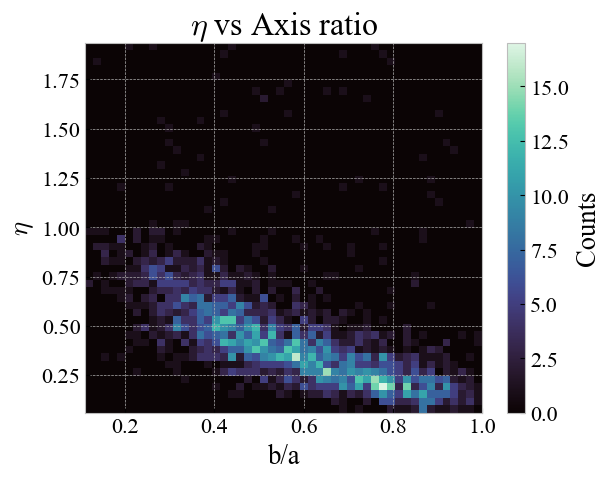

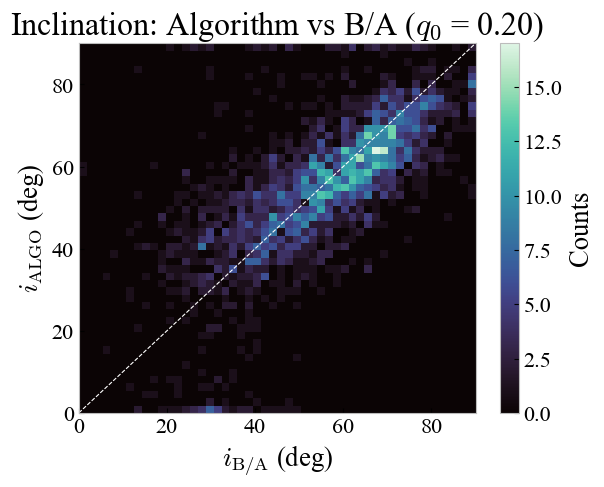

In [26]:
# Notes:
# - Uses the standard oblate disk formula with intrinsic thickness q0:
#     cos^2 i = (q^2 - q0^2) / (1 - q0^2),  i in [0°, 90°]
#   where q = b/a = BA_LEDA. We clip invalids and set i=90° if q < q0.
# - Set q0 per your preference (common choices: 0.13–0.25; I default to 0.2).
# - If your dataframe already has a column with your algorithm’s inclination
#   (degrees), name it 'INC_ALGO_deg'. If not, fill it using your code where marked.
#
# This cell will:
#   1) Load your HDF shown in the screenshot.
#   2) Add an inclination column from BA ('INC_BA_deg').
#   3) If 'INC_ALGO_deg' exists, compute residuals and quick diagnostics,
#      and plot comparisons.
#
import numpy as np
from scipy.optimize import root_scalar


df = pd.read_hdf('subset_data.h5', key='galaxies')

Q0_DEFAULT = 0.20

def inc_from_ba(q, q0=Q0_DEFAULT):
    q = np.asarray(q, dtype=float)
    q0 = float(q0)
    out = np.full_like(q, np.nan, dtype=float)
    # Valid where q >= q0 and q <= 1
    mask_valid = (~np.isnan(q)) & (q >= q0) & (q <= 1.0)
    # Clip tiny numeric issues
    num = np.clip(q[mask_valid]**2 - q0**2, 0.0, None)
    den = max(1.0 - q0**2, 1e-12)
    cos2 = np.clip(num / den, 0.0, 1.0)
    inc = np.degrees(np.arccos(np.sqrt(cos2)))
    out[mask_valid] = inc
    # If q < q0, set to edge-on (90°)
    mask_edge = (~np.isnan(q)) & (q < q0)
    out[mask_edge] = 90.0
    # If q > 1 (bad entries), set to face-on (0°)
    mask_face = (~np.isnan(q)) & (q > 1.0)
    out[mask_face] = 0.0
    return out

df['INC_BA_deg'] = inc_from_ba(df['BA_LEDA'].values, q0=Q0_DEFAULT)



preview_cols = ['GALAXY', 'BA_LEDA', 'INC_BA_deg', 'INC_ALGO_deg']
preview = df.loc[:, [c for c in preview_cols if c in df.columns]].head(25)

def cos_plus_exp(x_deg, A, B, D,C, E, F):
        x_rad = np.deg2rad(x_deg)
        return A * np.cos(B * x_rad+C) + D + E * np.exp(F * x_deg)

def find_inclination_from_eta(eta_target, A, B, D, C, E, F,
                                search_range=(0, 90), tol=1e-6, verbose=False):
    def f(x):
        return cos_plus_exp(x, A, B, C,D, E, F) - eta_target

    x_min, x_max = search_range
    fmin, fmax = f(x_min), f(x_max)
    if np.sign(fmin) == np.sign(fmax):
        if verbose:
            print("Eta target is outside model range, extrapolating.")
        x_grid = np.linspace(x_min, x_max, 2000)
        return x_grid[np.argmin(np.abs(f(x_grid)))]

    sol = root_scalar(f, bracket=[x_min, x_max], method='brentq', xtol=tol)
    if not sol.converged:
        raise RuntimeError("Root finding failed to converge.")
    return sol.root
A=-0.24444315 
B=-2.27534356  
C=8.59288841 
D=-1
E=0.94045508  
F=0.00969384
inc_list=[]
for eta in eta_g:
    inc_bt = float(
        find_inclination_from_eta(
            eta, A, B, C, D, E, F, verbose=False
        )
    )
    inc_list.append(inc_bt)
x=[0,90]
# Plot 1: BA vs inclination from BA 
plt.figure()
plt.hist2d(df['BA_LEDA'], eta_g, bins=50, cmap=cmap)
plt.colorbar(label='Counts')
plt.xlabel(r'b/a')
plt.ylabel(r'$\eta$')
plt.title(r'$\eta$ vs Axis ratio')

plt.show()

# Plot 2: Algorithm vs BA inclinations
plt.figure()
plt.hist2d(df['INC_BA_deg'], inc_list, bins=50, cmap=cmap)
plt.colorbar(label='Counts')
# 1:1 line
plt.plot(x,x, color='white', linestyle='--', linewidth=0.8, label='1:1 line')
plt.grid(None)
plt.xlabel(r'$i_{\text{B/A}}$ (deg)')
plt.ylabel(r'$i_{\text{ALGO}}$ (deg)')
plt.title(r'Inclination: Algorithm vs B/A ($q_0$ = {:.2f})'.format(Q0_DEFAULT))

plt.show()



/var/folders/hk/kt8z304n2n11x6tfqk2bmsmw0000gp/T/ipykernel_27742/463150444.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(loc='upper left', fontsize=8, frameon=False)


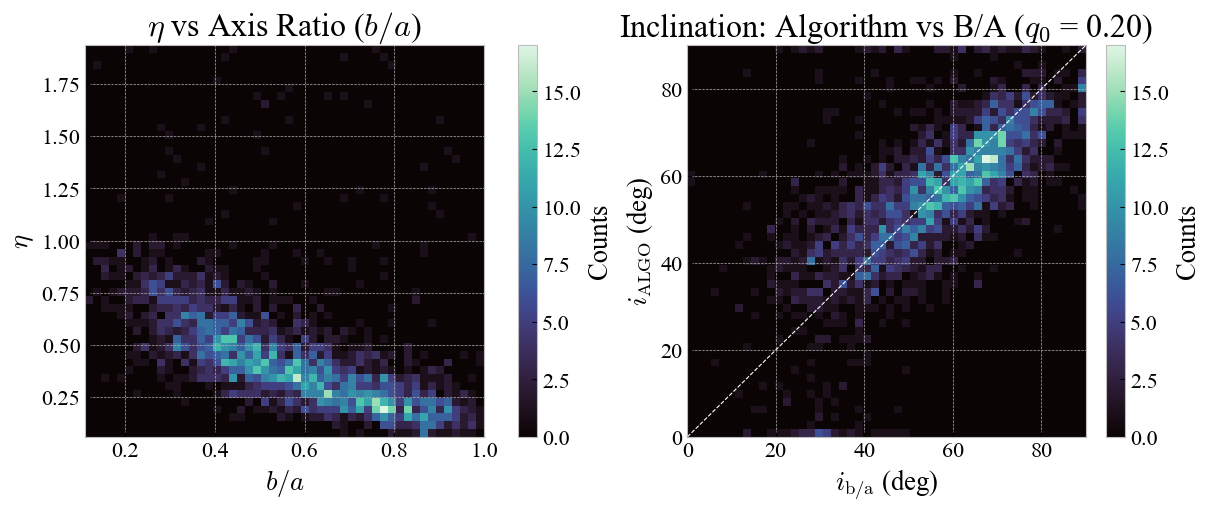

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

cmap = sns.color_palette("mako", as_cmap=True)

x = [0, 90]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
with PdfPages('/Users/Megan/Desktop/Desktop/Sonification/PlotsPaper/ba_incl.pdf') as pp:
    # --- Plot 1: η vs b/a ---
    h1 = axes[0].hist2d(df['BA_LEDA'], eta_g, bins=50, cmap=cmap)
    axes[0].set_xlabel(r'$b/a$')
    axes[0].set_ylabel(r'$\eta$')
    axes[0].set_title(r'$\eta$ vs Axis Ratio ($b/a$)')
    fig.colorbar(h1[3], ax=axes[0], label='Counts')

    # --- Plot 2: Algorithm vs B/A inclinations ---
    h2 = axes[1].hist2d(df['INC_BA_deg'], inc_list, bins=50, cmap=cmap)
    axes[1].plot(x, x, color='white', linestyle='--', linewidth=0.8)
    axes[1].legend(loc='upper left', fontsize=8, frameon=False)
    axes[1].set_xlabel(r'$i_{\text{b/a}}$ (deg)')
    axes[1].set_ylabel(r'$i_{\text{ALGO}}$ (deg)')
    axes[1].set_title(r'Inclination: Algorithm vs B/A ($q_0$ = {:.2f})'.format(Q0_DEFAULT))
    fig.colorbar(h2[3], ax=axes[1], label='Counts')
    pp.savefig(fig)

plt.show()

In [ ]:
pa_g = np.array([data['PA_g'][i][1] for i in data['PA_g'].index])
pa_r = np.array([data['PA_r'][i][1] for i in data['PA_r'].index])
pa_z = np.array([data['PA_z'][i][1] for i in data['PA_z'].index])
print(pa_g[pa_g>-5.].size)

2486


Text(0, 0.5, 'ETA_r')

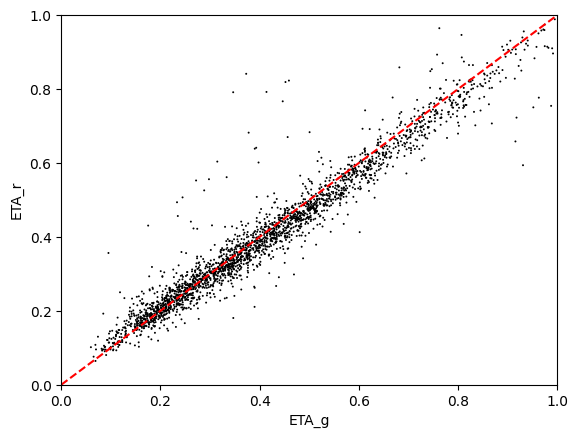

In [ ]:
# plot the eta values
plt.scatter(eta_g,eta_r,edgecolor='none',facecolor='black',s=2.)
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.axis([0.,1,0.,1.])
plt.xlabel('ETA_g')
plt.ylabel('ETA_r')

Text(0, 0.5, 'PA_r')

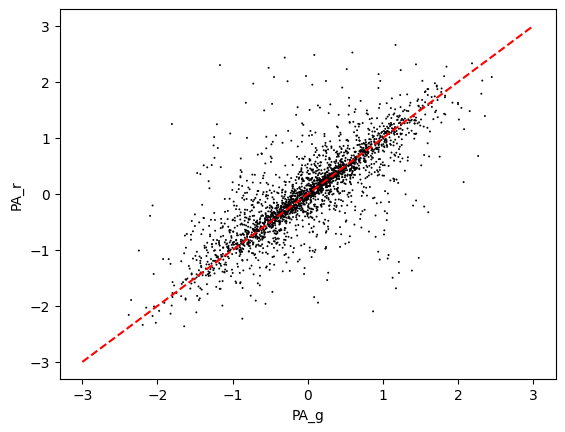

In [ ]:
# plot the PA values
plt.scatter(pa_g,pa_r,edgecolor='none',facecolor='black',s=2.)
plt.plot([-3.,3],[-3.,3.],color='red',linestyle='--')
#plt.axis([0.,1,0.,1.])
plt.xlabel('PA_g')
plt.ylabel('PA_r')